# CSE 572: Homework 2

This notebook provides a template and starting code to implement the Homework 2 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Prepare the dataset

In this homework, you will compare the effect of multiple dimensionality reduction techniques on the classification performance for the [Covertype dataset](https://archive.ics.uci.edu/ml/datasets/Covertype).  The classification task for this dataset is to predict the forest cover type of a 30 m x 30 m patch of forested land described by 54 attributes. The attributes include features such as elevation, aspect, slope, soil characteristics, etc. The dataset was created by the Department of Forest Sciences at Colorado State University and the US Forest Service in 1998. 

In [ ]:
seed=0

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_covtype

dataset = fetch_covtype(as_frame=True)

data = dataset.data
labels = dataset.target

In [ ]:
data.sample(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
506404,3190.0,294.0,26.0,806.0,373.0,1451.0,139.0,223.0,221.0,902.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357499,2912.0,100.0,12.0,603.0,273.0,769.0,239.0,224.0,113.0,541.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173064,3170.0,322.0,3.0,120.0,10.0,4967.0,212.0,236.0,162.0,2650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128000,2832.0,0.0,18.0,85.0,18.0,2529.0,191.0,204.0,148.0,2742.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128949,2890.0,359.0,13.0,30.0,8.0,5208.0,200.0,216.0,153.0,1126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185039,3115.0,325.0,13.0,127.0,18.0,4055.0,187.0,225.0,178.0,1224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420250,3328.0,169.0,31.0,90.0,27.0,1490.0,226.0,234.0,116.0,1279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
430934,3330.0,329.0,18.0,703.0,35.0,2295.0,175.0,216.0,180.0,968.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31822,2615.0,128.0,14.0,30.0,4.0,1892.0,243.0,230.0,113.0,4686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408815,3175.0,203.0,7.0,170.0,20.0,2017.0,217.0,247.0,166.0,1867.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [ ]:
labels.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=seed
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality reduction

You will implement 2 dimensionality reduction techniques:
- PCA (linear)
- Autoencoder neural network (non-linear)

For PCA, you will create a plot of the total fraction of explained variance by the first 1 through 10 principal components (as we did in Lab 11). Choose the number of principal components to retain based on the inflection point of this plot, i.e., the point at which the increase in total explained variance begins to plateau (as we did in Lab 11).

For the autoencoder neural network, implement a network with the following layers:
1. Input layer (# units = 54) [encoder]
2. Hidden layer (# units = 32) [encoder]
3. Hidden layer (# units = number of PCs retained for PCA) [encoded/bottleneck layer]
4. Hidden layer (# units = 32) [decoder]
5. Output layer (# units = 54) [decoder]

For example, if you chose to use 3 principal components in PCA, you will have a bottleneck layer of 3 units in your autoencoder. 

Use ‘relu’ activation for hidden layers and ‘sigmoid’ activation for the output layer, ‘sgd’ (stochastic gradient descent) for the optimizer, and ‘mse’ (mean squared error) as the loss function. Train your model for 100 epochs with a batch size of 64. Lab 12 will be a useful guide for this implementation. Note that you will use the predict() function with only the encoder part of the model to transform your features into the encoded (reduced-dimension) representation.

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.decomposition import PCA

n_components = 10

pca = PCA(n_components=n_components).fit(X_train)

In [ ]:
import numpy as np
for i in range(n_components):
    print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))
    
print('Total variance explained by 10 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

Percentage of variance explained by PC 1: 0.06854444979451482
Percentage of variance explained by PC 2: 0.0541524656894217
Percentage of variance explained by PC 3: 0.04440936908837072
Percentage of variance explained by PC 4: 0.03704399304724756
Percentage of variance explained by PC 5: 0.02783184159647002
Percentage of variance explained by PC 6: 0.026815175402672954
Percentage of variance explained by PC 7: 0.022277809800697518
Percentage of variance explained by PC 8: 0.021182620016194934
Percentage of variance explained by PC 9: 0.019941278009590935
Percentage of variance explained by PC 10: 0.019477414691665997
Total variance explained by 10 PCs: 0.3416764171368471


[0.06854444979451482, 0.12269691548393652, 0.16710628457230725, 0.20415027761955482, 0.23198211921602482, 0.25879729461869777, 0.2810751044193953, 0.30225772443559024, 0.3221990024451812, 0.34167641713684715]


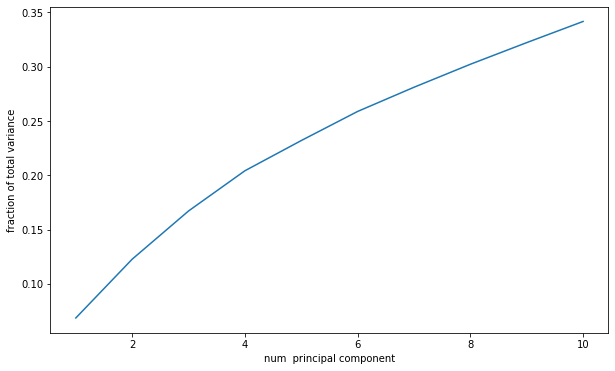

In [ ]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

arr=[]

s=np.sum(pca.explained_variance_ratio_)
arr.append((pca.explained_variance_ratio_[0]))
for i in range(1,n_components):
     arr.append(pca.explained_variance_ratio_[i]+arr[i-1])
print(arr)
plt.figure(figsize=(10, 6))
pc=range(1,11)
plt.xlabel("num  principal component")
plt.ylabel("fraction of total variance")
plt.plot(pc,arr)


we are selecting 4 PC 


In [ ]:
n_components = 4

pca = PCA(n_components=n_components).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(406708, 4)

In [ ]:
  
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 4

# This is our input image
input_img = keras.Input(shape=(X_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(54, activation='relu')(input_img)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(54, activation='relu')(decoded)
decoded = layers.Dense(X_train.shape[1], activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
autoencoder.compile(optimizer='sgd', loss='mse')

In [ ]:
autoencoder.fit(x=X_train, y=X_train,
                epochs=100,
                batch_size=64,
                shuffle=True)

Epoch 1/100
6355/6355 [==============================] - 20s 3ms/step - loss: 1.0852
Epoch 2/100
6355/6355 [==============================] - 17s 3ms/step - loss: 0.9973
Epoch 3/100
6355/6355 [==============================] - 17s 3ms/step - loss: 0.9922
Epoch 4/100
6355/6355 [==============================] - 17s 3ms/step - loss: 0.9869
Epoch 5/100
6355/6355 [==============================] - 19s 3ms/step - loss: 0.9785
Epoch 6/100
6355/6355 [==============================] - 16s 3ms/step - loss: 0.9704
Epoch 7/100
6355/6355 [==============================] - 16s 3ms/step - loss: 0.9622
Epoch 8/100
6355/6355 [==============================] - 17s 3ms/step - loss: 0.9536
Epoch 9/100
6355/6355 [==============================] - 17s 3ms/step - loss: 0.9450
Epoch 10/100
6355/6355 [==============================] - 16s 3ms/step - loss: 0.9373
Epoch 11/100
6355/6355 [==============================] - 16s 3ms/step - loss: 0.9297
Epoch 12/100
6355/6355 [==============================] - 29s 4

In [ ]:
test_recon_ae = encoder.predict(X_test)
train_recon_ae = encoder.predict(X_train)

12710/12710 [==============================] - 15s 1ms/step


## Classification

You will use a Random Forest classifier with 100 trees for the classification model (using Scikit-learn). Leave all other hyperparameters as their default values. You will train 3 separate random forest classifiers with 1) input data transformed using PCA, 2) input data transformed using autoencoder, 3) no dimensionality reduction (original data attributes).

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0,n_estimators=100)
clf1.fit(X_train_pca,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=0,n_estimators=100)
clf2.fit(train_recon_ae,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(random_state=0,n_estimators=100)
clf3.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

## Evaluation

Your final model evaluation should be performed on the test set. You will compare the results of the two dimensionality reduction + Random Forest methods (PCA + RF, Autoencoder + RF) as well as a baseline Random Forest classifier that does not use any dimensionality reduction (the original attributes will be the input feature vector). For each of the 3 methods, print the classification report (including class-wise precision, recall, F1 + overall accuracy) and plot the confusion matrix. 

### PCA + RF Results

In [ ]:
labels

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
y_pred1=clf1.predict(X_test_pca)
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           1       0.72      0.76      0.74     59494
           2       0.84      0.77      0.80     92569
           3       0.79      0.73      0.76     11510
           4       0.54      0.74      0.63       598
           5       0.31      0.72      0.43      1232
           6       0.50      0.64      0.56      4092
           7       0.65      0.83      0.73      4809

    accuracy                           0.76    174304
   macro avg       0.62      0.74      0.66    174304
weighted avg       0.77      0.76      0.77    174304



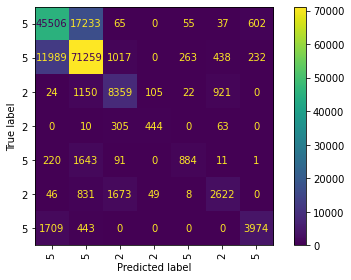

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf1, X_test_pca, y_test, display_labels=labels, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

## Autoencoder + RF Results

In [ ]:
from sklearn.metrics import classification_report
y_pred2=clf2.predict(test_recon_ae)
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           1       0.77      0.78      0.77     62795
           2       0.84      0.80      0.82     88888
           3       0.79      0.73      0.76     11443
           4       0.44      0.66      0.53       543
           5       0.32      0.68      0.43      1349
           6       0.47      0.60      0.53      4074
           7       0.74      0.87      0.80      5212

    accuracy                           0.78    174304
   macro avg       0.62      0.73      0.66    174304
weighted avg       0.79      0.78      0.79    174304



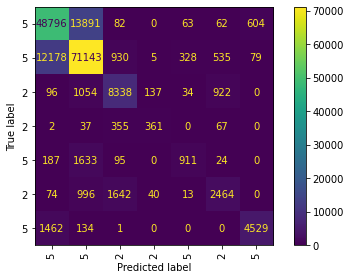

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf2, test_recon_ae, y_test, display_labels=labels, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

### Baseline RF Results

In [ ]:
from sklearn.metrics import classification_report
y_pred3=clf3.predict(X_test)
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95     62136
           2       0.97      0.95      0.96     87260
           3       0.96      0.94      0.95     10809
           4       0.84      0.91      0.87       759
           5       0.77      0.94      0.85      2340
           6       0.90      0.93      0.91      5041
           7       0.95      0.97      0.96      5959

    accuracy                           0.95    174304
   macro avg       0.90      0.94      0.92    174304
weighted avg       0.95      0.95      0.95    174304



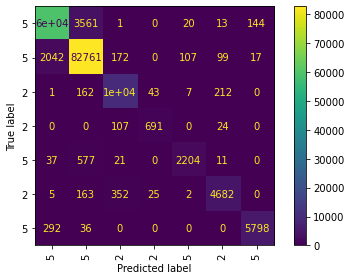

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf3, X_test, y_test, display_labels=labels, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

## Discussions

The accuracy of the baseline model when we consider all the features is around 95% while we got an overall accuracy of 76% for PCA model and 78% for the autoencoder model.

 The F1 score of PCA model and autoencoder was seen to be similar too. While the Baseline model with all the features exceeds the performance by a long range but the tradeoff between no. of attributes and accuracy is very large.
 
 We used 4 attributes for an accuracy of 76% (PCA) and 78% (Autoencoders) while we used 54 of them to get an accuracy of 95%.

The autoencoders slightly over performed the PCA model, but training a autoencoder model took much more time and computation than the PCA model.

We can try and increase the no. of PC to get better and closer acuracies to the baseline model.